In [1]:
from LIMxCMBL.init import *

In [2]:
zmin = 3.5
zmax = 8.1
chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))
Lambda = 0.01

In [3]:
L = chimax - chimin

In [4]:
from LIMxCMBL.noise import *

In [5]:
eIeI, eLOeLO, eIeLO, eLOeI = get_eHIeHI(chimin, chimax, Lambda)
eHIeHI = eIeI + eLOeLO - eIeLO - eLOeI

In [6]:
eLOeI.shape

(1652, 1652)

In [7]:
plt.show()
plt.rcParams['text.usetex'] = True

In [8]:
def tmp_plot(field):
    vminmax = np.max(np.abs(field))
    plt.figure(figsize=(3.5,3.5), dpi=100, facecolor='w',)

    # plot data
    plt.imshow(field, 
               origin='lower',
              cmap = 'seismic',
              vmin = -vminmax,
              vmax =  vminmax,
              extent=[chimin,chimax, chimin, chimax])

    plt.colorbar()

    plt.xlabel(r'$\chi$')
    plt.ylabel(r"$\chi'$")


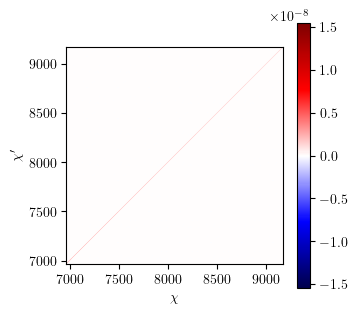

In [9]:
tmp_plot(eIeI)

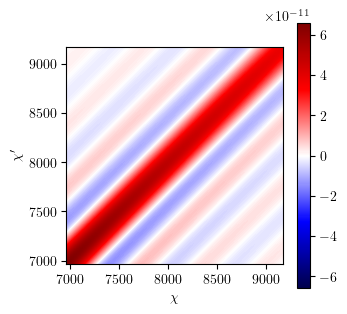

In [10]:
tmp_plot(eIeLO)

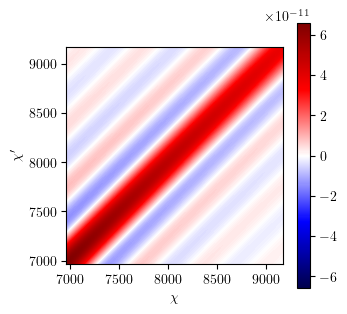

In [11]:
tmp_plot(eLOeI)

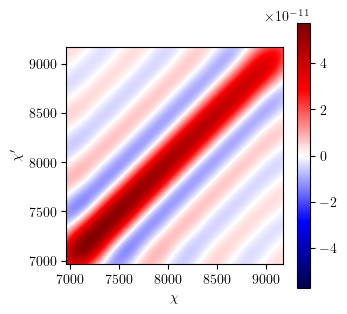

In [12]:
tmp_plot(eLOeLO)

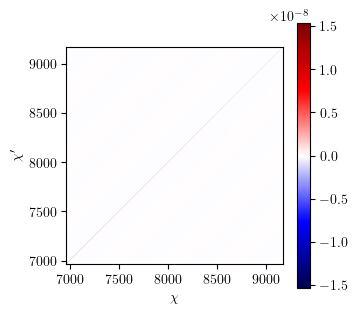

In [13]:
tmp_plot(eHIeHI)

In [14]:
1/Lambda

100.0

In [15]:
from matplotlib import colors

Text(0.5, 1.0, "$\\langle \\epsilon^{I,{\\sf HI}}_\\ell(\\chi) \\epsilon^{I, {\\sf Hi}}_{-\\ell}(\\chi')\\rangle',\\ \\Lambda=$1.0e-02")

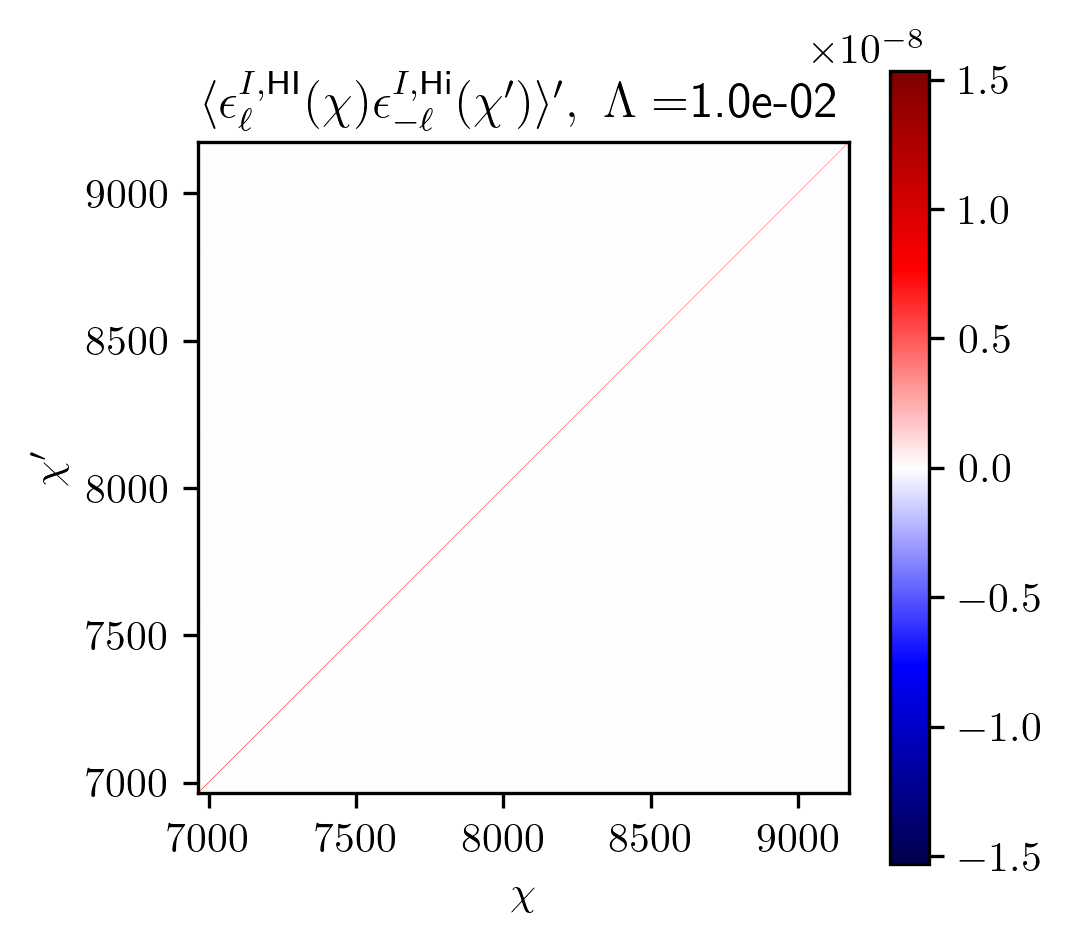

In [16]:
vminmax = np.max(np.abs(eHIeHI))
plt.figure(figsize=(3.5,3.5), dpi=300, facecolor='w',)
 
# plot data
plt.imshow(eHIeHI, 
           origin='lower',
          cmap = 'seismic',
          vmin = -vminmax,
          vmax =  vminmax,
           extent=[chimin, chimax, chimin, chimax])
plt.colorbar()

plt.xlabel(r'$\chi$')
plt.ylabel(r"$\chi'$")
plt.title(r"$\langle \epsilon^{I,{\sf HI}}_\ell(\chi) \epsilon^{I, {\sf Hi}}_{-\ell}(\chi')\rangle',\ \Lambda=$%.1e"%(Lambda))

Text(0.5, 1.0, "$\\langle \\epsilon^{I,{\\sf HI}}_\\ell(\\chi) \\epsilon^{I, {\\sf Hi}}_{-\\ell}(\\chi')\\rangle',\\ \\Lambda=$1.0e-02")

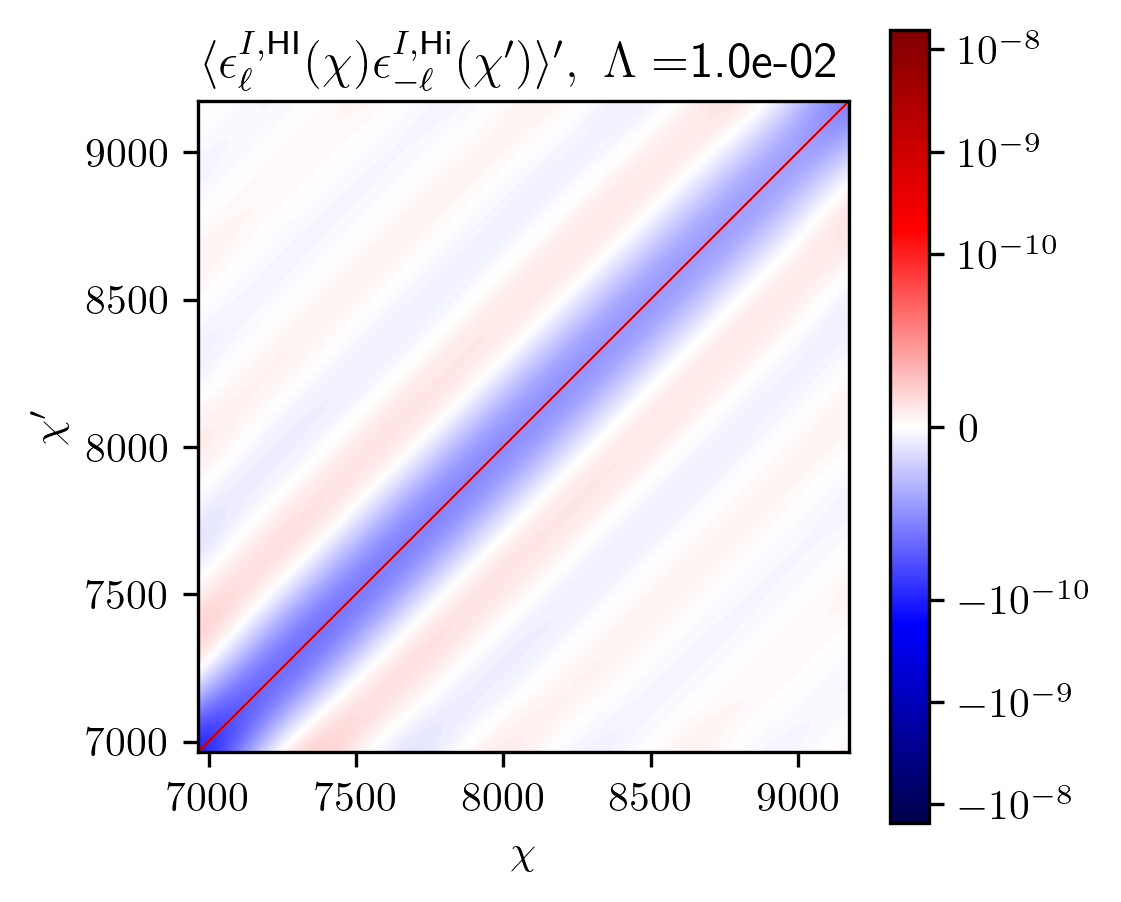

In [17]:
vminmax = np.max(np.abs(eHIeHI))
plt.figure(figsize=(3.5,3.5), dpi=300, facecolor='w',)
linthresh = 1e-10
lin_factor = 33
norm = colors.SymLogNorm(linthresh=linthresh, 
                         linscale = np.log10(lin_factor),
                         vmin=-vminmax, 
                         vmax=vminmax, 
                         base=10)

# plot data
plt.imshow(eHIeHI, 
           origin='lower',
          cmap = 'seismic',
           norm = norm,
           extent=[chimin, chimax, chimin, chimax])
plt.colorbar()

plt.xlabel(r'$\chi$')
plt.ylabel(r"$\chi'$")
plt.title(r"$\langle \epsilon^{I,{\sf HI}}_\ell(\chi) \epsilon^{I, {\sf Hi}}_{-\ell}(\chi')\rangle',\ \Lambda=$%.1e"%(Lambda))